In [1]:
import os
import io
import glob
import sys
import astropy.io.fits
import matplotlib
import numpy as np
import time
import timeit

import psycopg2

import pandas as pd
import pandas.io.sql as psql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

from eCallistoProject import plot_config

module_path = os.path.abspath(os.path.join('radiospectra'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import radiospectra

from radiospectra.sources import CallistoSpectrogram

from matplotlib.backends.backend_pdf import PdfPages, FigureCanvasPdf, PdfFile

import warnings
warnings.filterwarnings("ignore")
from scipy import stats

C:\Users\delbe\OneDrive\Desktop\eCallistoValidation\radiospectra\radiospectra\version.py:12: UserWarning: could not determine radiospectra package version; this indicates a broken installation
  warnings.warn(


# Signal-to-noise ratio

Das Signal-Rausch-Verhältnis (SNR oder S/N) ist in Wissenschaft und Technik ein  verwendetes Maß, das den Pegel des gewünschten Signals mit dem Pegel des Hintergrundrauschens vergleicht. 
Das SNR ist definiert als das Verhältnis der Leistung eines Signals (sinnvolle Eingabe) zur Leistung des Hintergrundrauschens (sinnlose oder unerwünschte Eingabe):

SNR = P signal/P noise


* Ein Beispiel:

Stellen wir uns vor, dass wir in einem großen Raum sind, Ich bin auf der einen Seite und Kushtrim auf der andere Seite, und Kushtrim versucht, mit mir zu sprechen.
Wenn seine Stimme zu leise ist, kann ich ihn nur dann hören, wenn er lauter ruft. Dies ist das Problem mit toten Zonen oder der Signalstärke.

SNR ist das Problem, wenn wir am selben Ort sind, aber der Raum voller anderer Menschen ist. Wenn Kushtrim versucht, mit mir zu sprechen, müssen wir all die Geräusche, die andere Leute machen, übertönen. Es ist nicht hilfreich, wenn jemand anderes eine ähnliche Stimme wie Kushtrim hat, sodass ich herausfinden muss, ob er oder jemand anders spricht.


###### Wie berechnet man das Signal-Rausch-Verhältnis in Python ?

Das Signal-Rausch-Verhältnis (SNR) ist das Ergebnis des Mittelwerts geteilt durch die Standardabweichung.
Mit dem SciPy library werden wir es finden können. SciPy library hat ein sub-package namens Statistics (stats), das eine Signal-to-Noise()-Funktion enthält, die einfach den gesuchten Wert findet.


### Python-Programm zur Berechnung des Signal-Rausch-Verhältnisses:

In [38]:
from scipy import stats 

array1 = [20, 4, 7, 1, 34]
array2 = [50, 12, 15, 34, 5] 

print ("signaltonoise ratio for array1: ",  
       stats.signaltonoise(array1, axis = 0, ddof = 0)) 
  
print ("\nsignaltonoise ratio for array2 : ",  
       stats.signaltonoise(array2, axis = 0, ddof = 0))  

AttributeError: module 'scipy.stats' has no attribute 'signaltonoise'

##### Die Funktion Signal-Rausch-Verhältnis benötigt 3 Parameter:
* Das erste ist das NumPy-Array, das die Beispieldaten enthält.
* Das zweite ist die Achse, entlang der der Mittelwert berechnet werden kann. Der Default ist 0. (int, Or None, Optional) if None , compute over the whole Array "Arr"

* Das dritte ist der Freiheitsgrad, der eine Korrektur der Standardabweichung ist.Der Default ist 0. (int, Optional) => "Degrees of freedom correction for standard deviation." 


#### Um die Implementierung des Signal-Rausch-Verhältnisses zu kennen:

In [60]:
import scipy.io

def signalToNoise(Arr, axis=0, ddof=0):
    Arr = np.asanyarray(Arr)  # Wandelt die Eingabe in ein ndarray um. 
    m = Arr.mean()
    std = Arr.std()
    return m/std 

In [61]:
import numpy as np 

array1 = [20, 4, 7, 1, 34]
array2 = [50, 12, 15, 34, 5] 

snr1 = signalToNoise(array1)
snr2 = signalToNoise(array2)


print ("Signaltonoise ratio for array1: ",snr1)

print ("\nSignaltonoise ratio for array2: ",snr2) 

Signaltonoise ratio for array1:  1.0772011326741244

Signaltonoise ratio for array2:  1.407327642072067


##  Für eCallisto_Daten

In [2]:
Path = 'Spec_test'

for root, dirs, files in os.walk(Path):
        for name in files:
            if name.endswith('.fit.gz'):
                
                full_path = os.path.join(root, name)
                spec = CallistoSpectrogram.read(full_path)
                data = np.absolute(spec.data.flatten())
                
                data = np.asanyarray(data)
                m = data.mean()
                print("\nMean:",m)
                std = data.std()
                print("Std: "+ str(std))
                snr =  m/std
                print("SNR: "+ str(snr))  


Mean: 123.9064896373057
Std: 6.840155145986451
SNR: 18.114572987428424

Mean: 124.62368634259259
Std: 11.742124762325874
SNR: 10.613384618637555

Mean: 176.5582159957462
Std: 10.90168437862277
SNR: 16.19549877466285

Mean: 151.5350575705239
Std: 12.668037380821467
SNR: 11.961999559611144

Mean: 145.03640472078297
Std: 14.779166355839033
SNR: 9.813571430805446


## Original Spektrogramm:

18.114572987428424


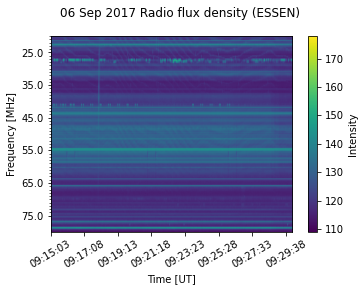

10.613384618637555


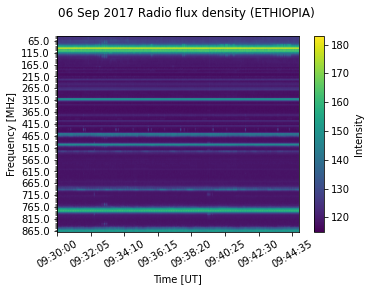

16.19549877466285


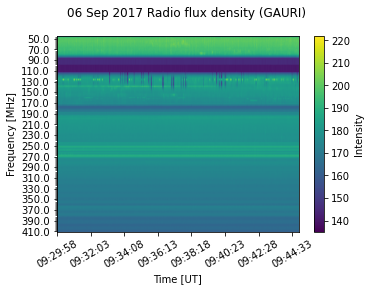

11.961999559611144


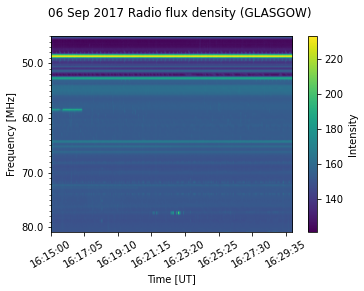

9.813571430805446


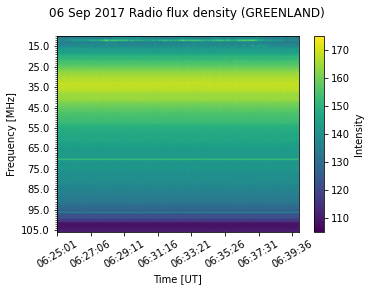

In [54]:
Path = 'Spec_test'
for root, dirs, files in os.walk(Path):
        for name in files:
            if name.endswith('.fit.gz'):
                
                full_path = os.path.join(root, name)
                spec = CallistoSpectrogram.read(full_path)
                ax1 = spec.plot()
                data = np.absolute(spec.data.flatten())
                snr = signalToNoise(data)
                print(snr)             
                plt.show()

## subtract_bg("constbacksub", "elimwrongchannels")

5 channels eliminated
Eliminating sharp jumps between channels ...
22 channels eliminated
0.8155442301534274


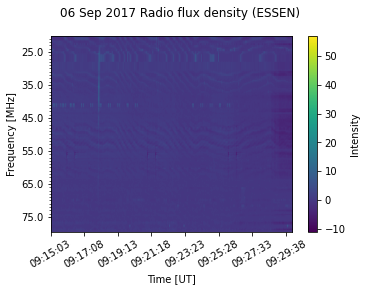

6 channels eliminated
Eliminating sharp jumps between channels ...
22 channels eliminated
0.7770536084846078


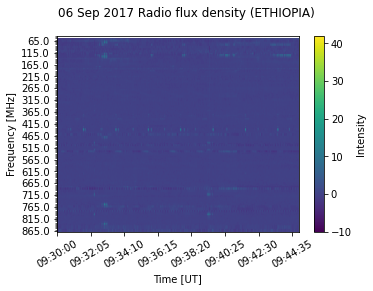

13 channels eliminated
Eliminating sharp jumps between channels ...
8 channels eliminated
0.7326147716251821


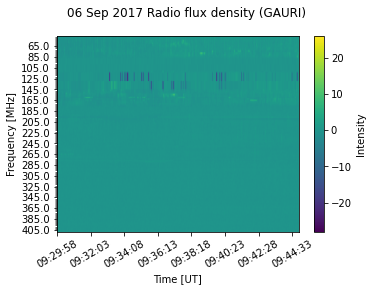

5 channels eliminated
Eliminating sharp jumps between channels ...
18 channels eliminated
0.6313218983827393


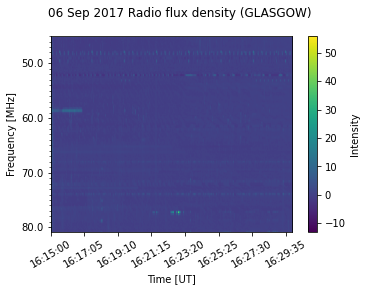

6 channels eliminated
Eliminating sharp jumps between channels ...
14 channels eliminated
1.290121212969707


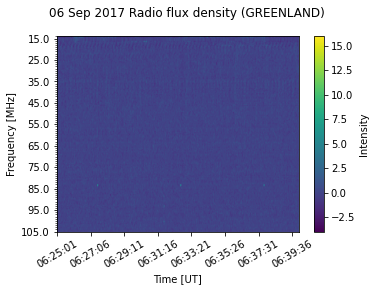

In [57]:
for root, dirs, files in os.walk(Path):
        for name in files:
            if name.endswith('.fit.gz'):
                
                full_path = os.path.join(root, name)
                spec = CallistoSpectrogram.read(full_path)
                spec2 = spec.subtract_bg("constbacksub", "elimwrongchannels")
                ax1 = spec2.plot()
                data2 = np.absolute(spec2.data.flatten())
                snr2 = signalToNoise(data2)
                print(snr2)             
                plt.show()

## subtract_bg("subtract_bg_sliding_window")

0.5386719187926776


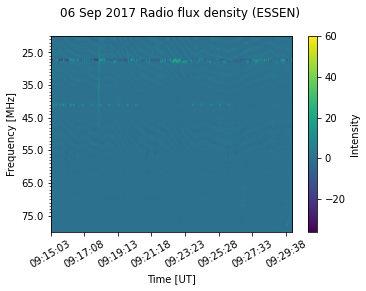

0.6892495923263565


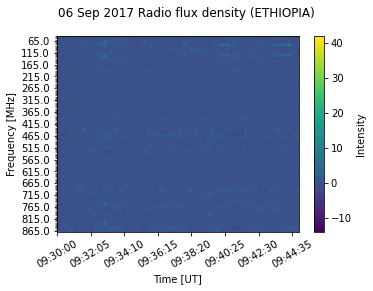

0.423365024892202


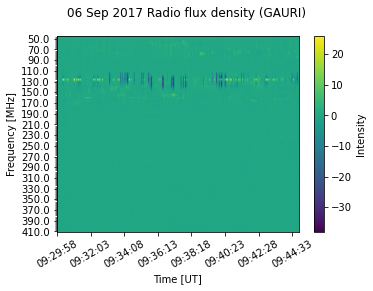

0.49024749008185037


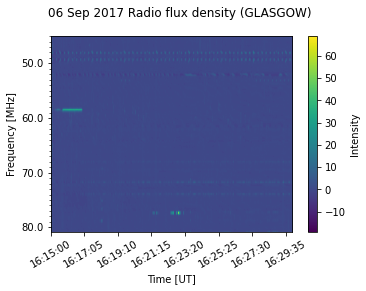

1.0366097156154146


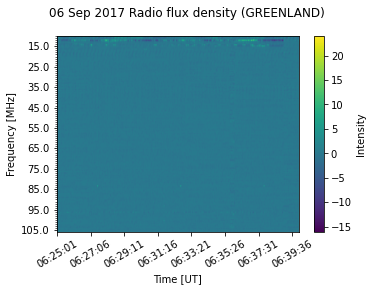

In [59]:
for root, dirs, files in os.walk(Path):
        for name in files:
            if name.endswith('.fit.gz'):
                
                full_path = os.path.join(root, name)
                spec = CallistoSpectrogram.read(full_path)
                spec3 = spec.subtract_bg("subtract_bg_sliding_window", window_width=800, affected_width=1,
                                         amount=0.05, change_points=True)
                ax1 = spec3.plot()
                data3 = np.absolute(spec3.data.flatten())
                snr3 = signalToNoise(data3)
                print(snr3)             
                plt.show()